# SHL AI Hiring Task: Automated Essay Scoring using NLP
------

Dataset derived from: https://drive.google.com/drive/folders/1zIoIniVDhLz-oFXVAmu1SMgWg9OmGZIl?usp=sharing

Questionnaire: https://docs.google.com/document/d/1UXtQ6fCWnGz9BZ6y2vYfVtwv22gUz1w3q7afopgy6GY/edit

*Coding initiated on 17th September 2021 at 3:53 pm by RSK*

## **STEP ZERO**: Pre-requisite prep
-------
1. Import all necessary libraries and set constant variables
2. Upload and Import train and test datasets


In [131]:
!pip install pyspellchecker
# import all necessary libraries

# For dataframes
import pandas as pd 

# For numerical arrays
import numpy as np 

# For stemming/Lemmatisation/POS tagging
import spacy

# For getting stopwords
from spacy.lang.en.stop_words import STOP_WORDS

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For handling string
import string

# For spell-check
from spellchecker import SpellChecker

# For performing mathematical operations
import math

# For dictionary related activites
from collections import defaultdict

# For counting actions (EDA)
from collections import  Counter

# For count vectorisation (EDA)
from sklearn.feature_extraction.text import CountVectorizer

# For generating random integers
from random import randint

# For plotting
import seaborn as sns

print("Necessary libraries imported")

# Constant variables 

# spaCy language lemmatiser model
sp=spacy.load('en_core_web_sm')
spell = SpellChecker()


print("Constant variables ready")

Necessary libraries imported
Constant variables ready


In [67]:
# import train and test datasets

df=pd.read_csv('/content/sample_data/train.csv')
test_df=pd.read_csv('/content/sample_data/test.csv')
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,promptId,uniqueId,essay,evaluator_rating,corpus,avg_char_per_word,total_words
0,1,1_323,"At present age, our education system is not go...",3.0,present age education system good thing requir...,6.08,133
1,1,1_238,I am agree the tightly defined curriculum of o...,4.0,agree tightly define curriculum education syst...,6.90,163
2,1,1_212,I strongly agree with the statement that tight...,2.0,strongly agree statement tight schedule educat...,6.25,64
3,1,1_117,Our education system is nice quitely but i dis...,2.0,education system nice quitely disagree change ...,6.11,131
4,1,1_229,i am totally agree with the statement that tig...,3.0,totally agree statement tightly define curricu...,6.23,111


## **STEP ONE**: Exploratory Data Analysis
-------
1. View the basic characteristics of the training dataset
2. Inspect key properties of essays like number of words, number of characters per word, most used word and least used word, etc.


In [97]:
#basic observable characteristics 
print("shape of dataset: ",df.shape)
print("sample essay: ",df.essay.iloc[randint(0,len(df))])
print("Total null values: \n",df.isnull().sum())

shape of dataset:  (1240, 7)
sample essay:  education system is no room for imagination and creativity. student are not educated in school life all time he and she create a new imagination and creativity and all sedhuleis waste are time . student are weaste a time in new stand and new creativity education is most important and mostluy student are not serious and not doing prepare education . school have no room for imagination and creativity it education is most complusary primary eduvcation and secandary education its all education are very impriortant and it succes our life it will creat a main considreation to education are no room for imagination and creativity it also are create a new genreation and its create new task handle curriculum of our education is systamtic work and it doing best education time student is no waste time is new imaginaytion and creativity. creatuivity are doing but knowledge come in student that s creatity is best all student are played but education time i

In [98]:
# For getting word-len characteristics of essays

def get_avg_len(text):
  words=text.split()
  word_len=0
  for word in words:
    word_len+=len(word)
  
  ret= round(word_len/len(words),2)
  return ret

def total_words(text):
  words=text.split()
  return len(words)

df['avg_char_per_word']=df.essay.apply(lambda x: get_avg_len(x))
df['total_words']=df.essay.apply(lambda x: total_words(x))

df.head()

,promptId,uniqueId,essay,evaluator_rating,corpus,avg_char_per_word,total_words
0,1,1_323,"At present age, our education system is not go...",3.0,present age education system good thing requir...,4.59,306
1,1,1_238,I am agree the tightly defined curriculum of o...,4.0,agree tightly define curriculum education syst...,5.78,299
2,1,1_212,I strongly agree with the statement that tight...,2.0,strongly agree statement tight schedule educat...,4.78,158
3,1,1_117,Our education system is nice quitely but i dis...,2.0,education system nice quitely disagree change ...,4.91,312
4,1,1_229,i am totally agree with the statement that tig...,3.0,totally agree statement tightly define curricu...,4.36,339


**AIM** : *To study the distribution of evaluated scores against all prompts*

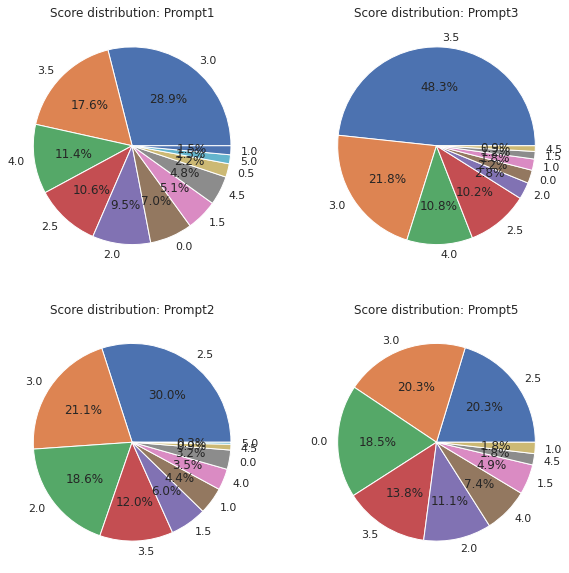

In [99]:
fig = plt.figure(figsize=(10,10))
prompt_id_list=[1,2,3,5]
for i in range(0,4):
  curdf=df[df['promptId']==prompt_id_list[i]]
  labels = []
  sizes = []
  for x, y in curdf.evaluator_rating.value_counts().items():
    labels.append(x)
    sizes.append(y)
  ax1 = plt.subplot2grid((2,2),((i)%2,math.floor((i)/2)))
  plt.pie(sizes,labels=labels,autopct='%1.1f%%')
  plt.title('Score distribution: Prompt'+str(prompt_id_list[i]))
plt.show()


**The following conclusions can be made from these series of pie charts:**

1. There is a big difference in the evaluation methods of each prompt (18.5% of total attendees of prompt 5 got zero marks, whereas the chance of getting zero in prompt 3 is only 3.2%)

2. The distribution of marks are not even, instead mostly scattered around 2.5-3.5

**AIM**: *To gather insights about evaluator's score versus average word length for each prompt*

Graph for evaluator rating vs avg word length


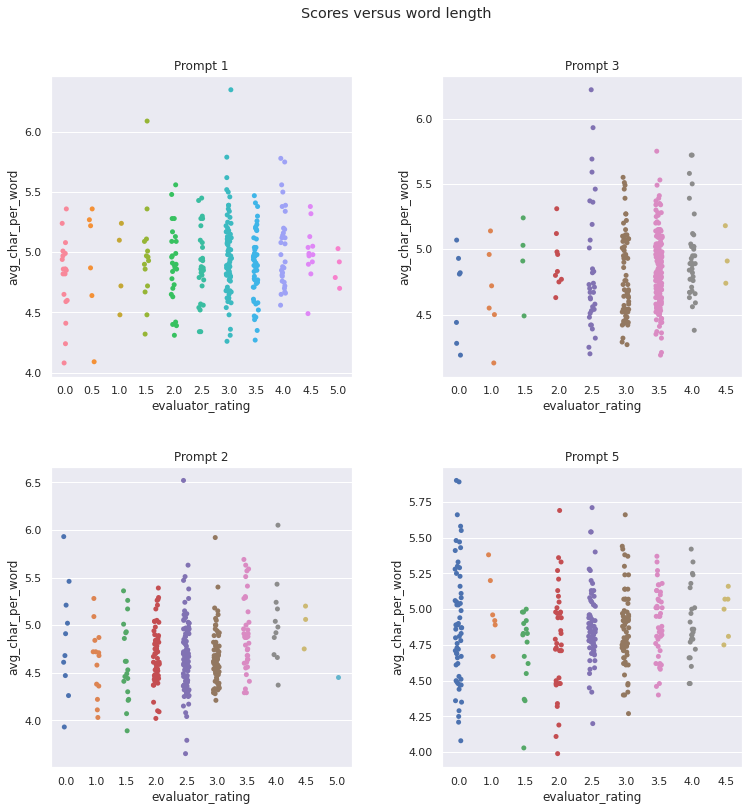

In [100]:
print("Graph for evaluator rating vs avg word length")

fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Scores versus word length')

prompt_id_list=[1,2,3,5]
for i in range(0,4):
  curdf=df[df['promptId']==prompt_id_list[i]]  
  sns.stripplot(ax=axes[i%2,math.floor(i/2)],
    data=curdf,
    x="evaluator_rating", y="avg_char_per_word")
  axes[i%2,math.floor(i/2)].set_title("Prompt "+str(prompt_id_list[i]))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
fig.show()



**The following conclusions can be made from these series of seaborn charts:**

1. There is variation of word length versus score with respect to the type of prompt. 

2. To the naked eye, no significant trend/pattern can be found which maps word-length to score

**AIM**: *To gather insights about evaluator's score versus total words used in an essay for each prompt*

Graph for evaluator rating vs total words in essay


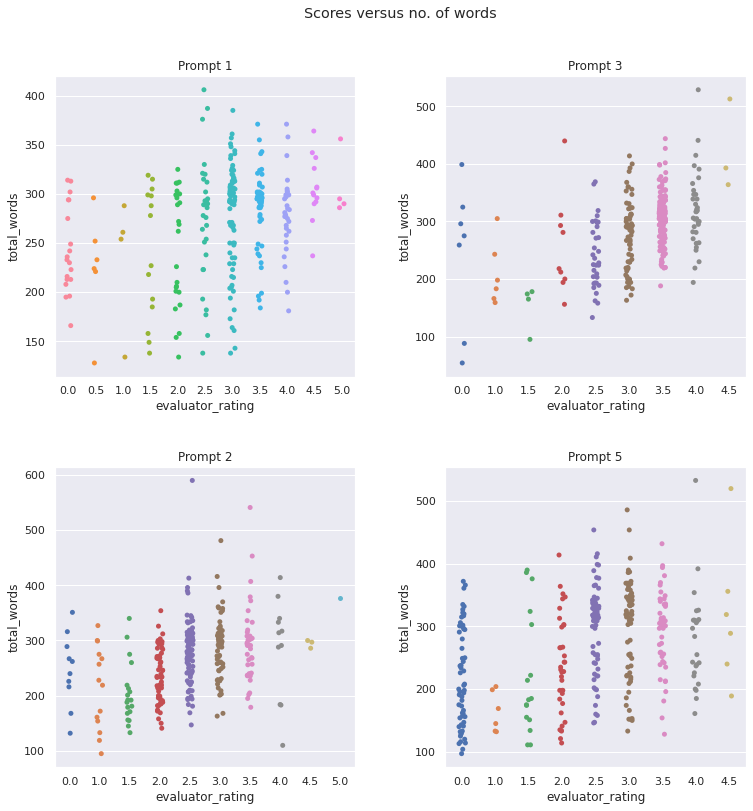

In [101]:
print("Graph for evaluator rating vs total words in essay")

fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Scores versus no. of words')

prompt_id_list=[1,2,3,5]
for i in range(0,4):
  curdf=df[df['promptId']==prompt_id_list[i]]  
  sns.stripplot(ax=axes[i%2,math.floor(i/2)],
    data=curdf,
    x="evaluator_rating", y="total_words")
  axes[i%2,math.floor(i/2)].set_title("Prompt "+str(prompt_id_list[i]))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
fig.show()



**The following conclusions can be made from these series of seaborn charts:**

1. The marks awarded is highly scattered across total words in all prompts. There are cases where 200+ words are used still less marks are awarded. 

2. Prompt 3 shows lesser scattering, and is the most "obedient" in terms of total-words-based-variance, while Prompt 1 performing the worst

**AIM**: *To find the presence/frequency of stopwords*

Stop Words in all essay prompts


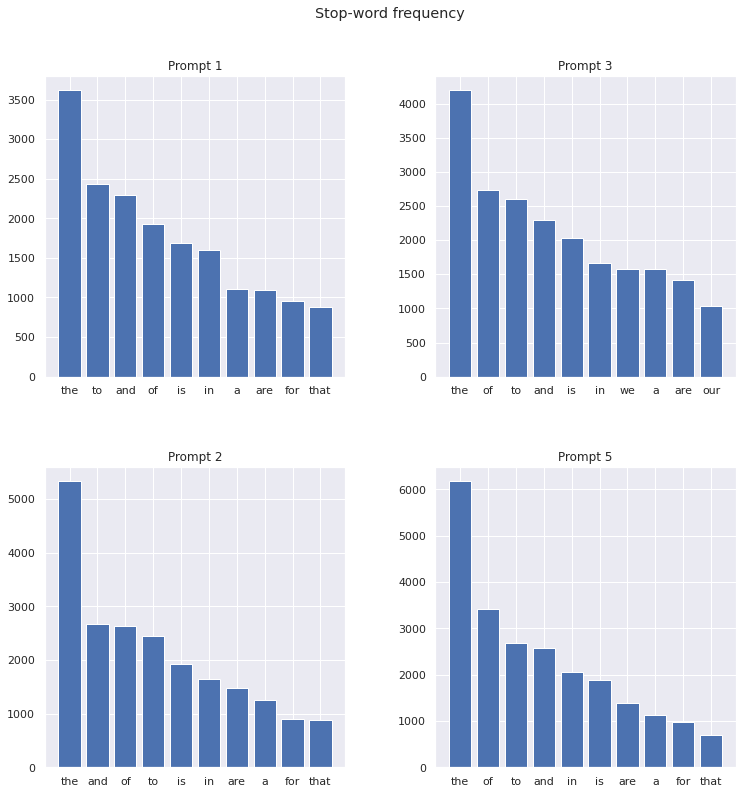

In [118]:
print("Stop Words in all essay prompts")

fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Stop-word frequency')

prompt_id_list=[1,2,3,5]
for i in range(0,4):
  dct=defaultdict(int) 
  curdf=df[df['promptId']==prompt_id_list[i]]  
  for essay in curdf.essay:
    for word in essay.split():
      if word in STOP_WORDS:
          dct[word]+=1
  top=sorted(dct.items(), key=lambda x:x[1],reverse=True)[:10] 
  x,y=zip(*top)
  axes[i%2,math.floor(i/2)].bar(x,y)
  axes[i%2,math.floor(i/2)].set_title("Prompt "+str(prompt_id_list[i]))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
fig.show()

        


From the above bar graphs, it is clear that a lot of stop-words are present, which raises the necessity to do stopword cleaning

**AIM**: *To find the presence/frequency of Punctuations*

Punctuations in all essay prompts


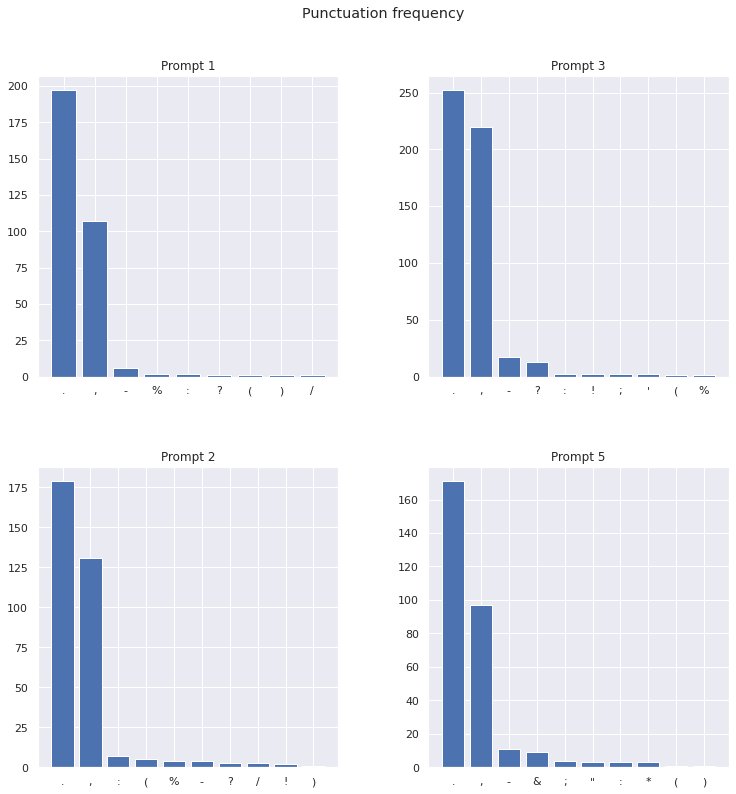

In [120]:
print("Punctuations in all essay prompts")

fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Punctuation frequency')
special = string.punctuation

prompt_id_list=[1,2,3,5]
for i in range(0,4):
  dct=defaultdict(int) 
  curdf=df[df['promptId']==prompt_id_list[i]]  
  for essay in curdf.essay:
    for word in essay.split():
      if word in special:
          dct[word]+=1
  top=sorted(dct.items(), key=lambda x:x[1],reverse=True)[:10] 
  x,y=zip(*top)
  axes[i%2,math.floor(i/2)].bar(x,y)
  axes[i%2,math.floor(i/2)].set_title("Prompt "+str(prompt_id_list[i]))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
fig.show()


Hence, it is clear that punctuations also need to be removed.

**AIM**: *To find the words that occur commonly under each prompt*

Most commonly occcuring words in all essay prompts


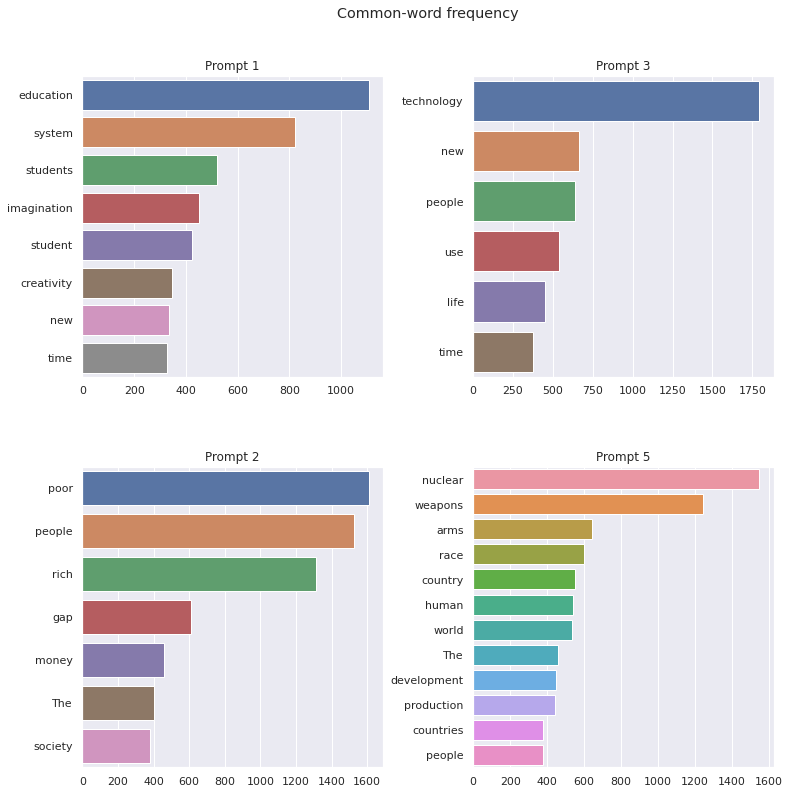

In [128]:
print("Most commonly occcuring words in all essay prompts")

fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Common-word frequency')

prompt_id_list=[1,2,3,5]
for i in range(0,4):
  dct=defaultdict(int) 
  curdf=df[df['promptId']==prompt_id_list[i]]  
  counter=Counter((" ".join(curdf.essay)).split())
  most=counter.most_common()
  x=[]
  y=[]
  for word,count in most[:40]:
      if (word not in STOP_WORDS) :
          x.append(word)
          y.append(count)
  sns.barplot(ax=axes[i%2,math.floor(i/2)],x=y,y=x)
  axes[i%2,math.floor(i/2)].set_title("Prompt "+str(prompt_id_list[i]))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
fig.show()


The following conclusions can be drawn from this graph:
1. Most frequently occuring words are highly related to the topic of the prompt ("education" in prompt 1 correlates to the education-based description of prompt 1, and so on)
2. There is a respectable amount different non-stop-words that occur frequently under each prompt, which makes it fairly straight-forward to incorporate the richness into the autocoring model.

**AIM**: *To analyse most-occuring bigrams in essays of all prompts* 

Bigram analysis


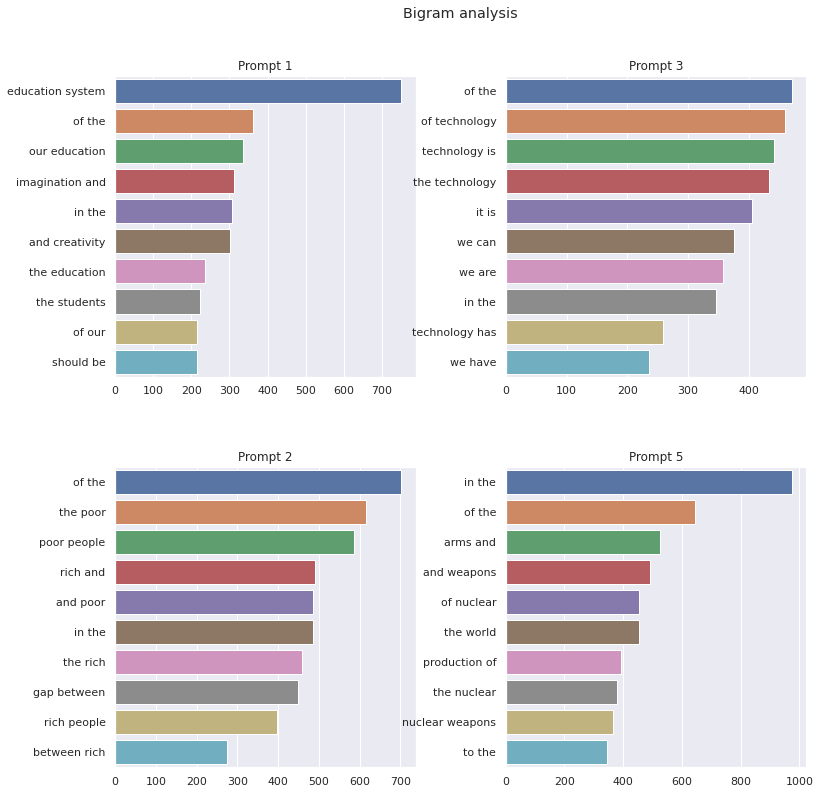

In [136]:
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

print("Bigram analysis")

fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Bigram analysis')

prompt_id_list=[1,2,3,5]
for i in range(0,4):
  dct=defaultdict(int) 
  top_bigrams=get_top_bigrams(df[df['promptId']==prompt_id_list[i]].essay)[:10]
  x,y=map(list,zip(*top_bigrams))
  sns.barplot(ax=axes[i%2,math.floor(i/2)],x=y,y=x)
  axes[i%2,math.floor(i/2)].set_title("Prompt "+str(prompt_id_list[i]))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
fig.show()



The following inferences can be drawn WRT the above graphs:
1. Bi-gram popularity is directly related to topic of prompt
2. Stop-words need to be removed to make bi-grams more content-related

## **STEP TWO**: Text Cleaning
------
1. Convert to lowercase
2. Treat punctuations
3. Remove numbers
4. Remove emojis, URLs and HTMLs (if any)
4. Spell-correct
5. Stop word removal
5. Stem and Lemmatise

In [49]:
## Text cleaning


punctuation_counter=0
digit_counter=0

# Translates punctuations to space, and then removes multiple spaces
def remove_punct(text):
    global punctuation_counter
    for i in string.punctuation:
      punctuation_counter+=text.count(i)
    
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text=text.translate(translator)
    return re.sub(' +', ' ', text)


# Replaces digits with whitespaces, and removes multiple spaces
def remove_digits(text):
    global digit_counter
    for c in range(ord('0'), ord('9')+1):
        digit_counter+=text.count(char(c))

    text = re.sub(r'[0-9]', ' ', text)
    return re.sub(' +', ' ', text)


# Removes all html tags that are of form <>
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)


# Removes all hyperlinks (if any)
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)


# Removes all emojis (if any)
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Applies lemmatization
def lemmatize(text):
     return " ".join(map(lambda x : x.lemma_, sp(text)))

#Corrects mispelled words
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

def stopwords(text):
  return " ".join(map(lambda x : x.lemma_,
                      [token for token in sp(text) if not token.is_stop]))


def cleaner(text):
  text=text.lower()
  text=remove_html(text)
  text=remove_URL(text)
  text=remove_emoji(text)
  text=remove_punct(text) 
  text=correct_spellings(text) #This function consumes a lot of run-time
  text=stopwords(text)
  text=lemmatize(text)
  return text

example_string="HELLO56,MY WORDD :) HTTPS://WWW.GITHUB.COM, SUP?"

print("Cleaned version of '",example_string,"' is: ",cleaner(example_string))

Cleaned version of ' HELLO56,MY WORDD :) HTTPS://WWW.GITHUB.COM, SUP? ' is:  hello world sup


In [51]:
#df['corpus']=df.essay.apply(lambda x: cleaner(str(x)))
df=pd.read_csv('cleaned.csv')
print('Cleaning done, \nPunctuations removed: ',punctuation_counter,'\nDigits removed: ',digit_counter)
df.head()

Cleaning done, 
Punctuations removed:  155 
Digits removed:  0
